In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [39]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [40]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [41]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [42]:
df.shape

(10000, 6)

In [43]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [44]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Extracurricular Activities']=lab.fit_transform(df['Extracurricular Activities'])

In [46]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities            int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [47]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

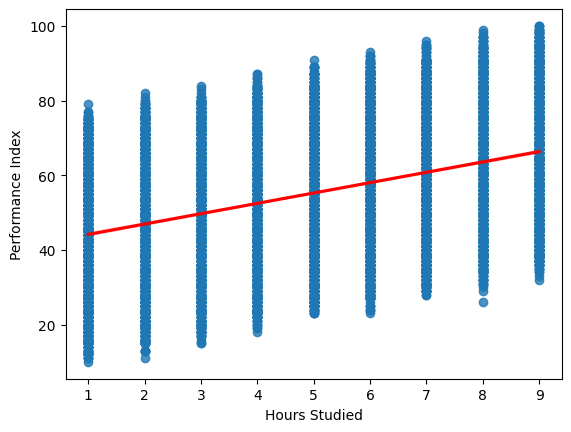

In [48]:
sns.regplot(x=df['Hours Studied'],y=y,line_kws={'color':'red'})


<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

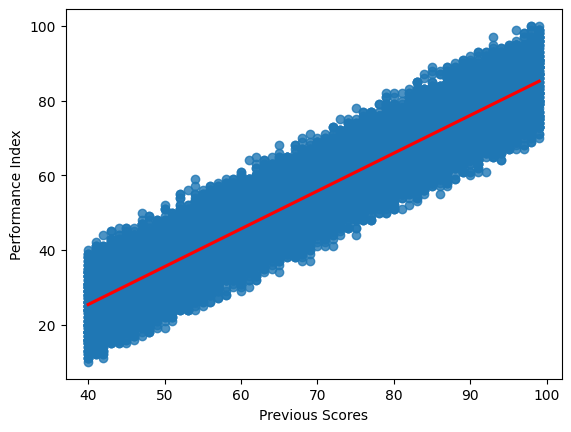

In [49]:
sns.regplot(x=df['Previous Scores'],y=y,line_kws={'color':'red'})

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

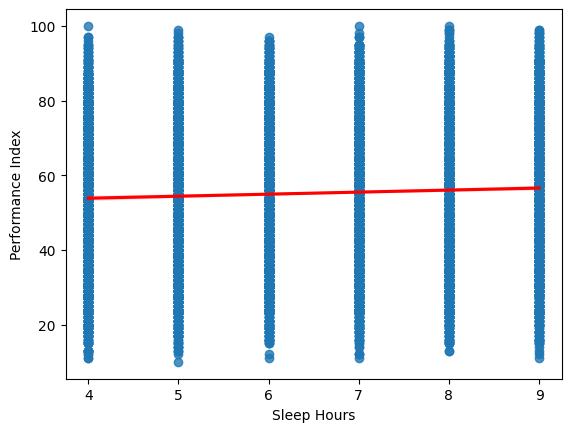

In [50]:
sns.regplot(x=df['Sleep Hours'],y=y,line_kws={'color':'red'})

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

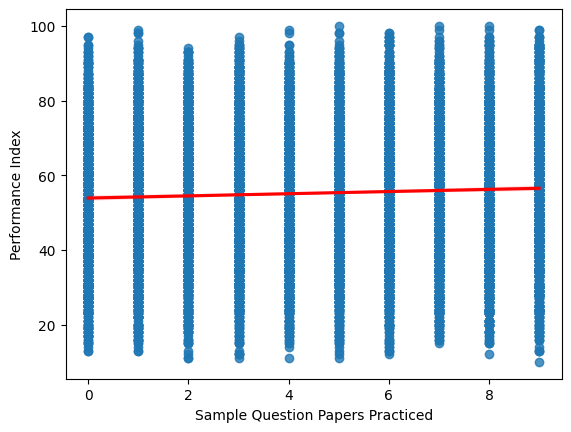

In [51]:
sns.regplot(x=df['Sample Question Papers Practiced'],y=y,line_kws={'color':'red'})

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [53]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('mean_absolute_percentage_error = ',mean_absolute_percentage_error(y_test,y_pred))
print('r2_score = ',r2_score(y_test,y_pred))

mean_absolute_percentage_error =  0.03504200252156813
r2_score =  0.9890110607021136


In [56]:
df1=pd.DataFrame({'actual value':y_test,'predicted value':y_pred,'difference':y_test-y_pred})
df1

,actual value,predicted value,difference
6252,51.0,54.747286,-3.747286
4684,20.0,22.618844,-2.618844
1731,46.0,47.936651,-1.936651
4742,28.0,31.340099,-3.340099
4521,41.0,43.059743,-2.059743
...,...,...,...
8014,32.0,31.819775,0.180225
1074,40.0,37.503045,2.496955
3063,33.0,33.424518,-0.424518
6487,69.0,67.925790,1.074210
